<a href="https://colab.research.google.com/github/sa1manhaidr/autogen/blob/main/TSF_TASK_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                        **Spark Foundation Internship**

              TASK #1 : Prediction using Supervise Machine Learning 
                       Data Science and Business Analytics 
                          Algorithm : Linear Regression 
                               Author : Salman Haider 













In [66]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn import metrics  
%matplotlib inline

**Create Data frame from csv**

In [67]:
# Reading data from remote link
link = "http://bit.ly/w-data"
df = pd.read_csv(link)
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**Data Wrangling**


In [68]:
df.shape

(25, 2)

In [69]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [70]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Boxplotting** 

It is a type of chart that depicts a group of numerical data through their quartiles. It is a simple way to visualize the shape of our data. It makes comparing characteristics of data between categories very easy.

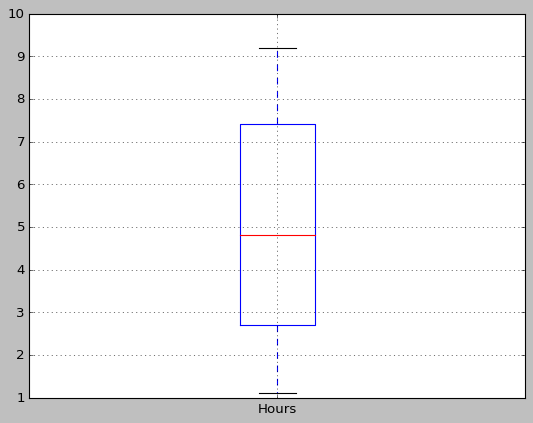

In [71]:
plt.style.use('classic')
df.boxplot(column='Hours');

**Ploting The Data**


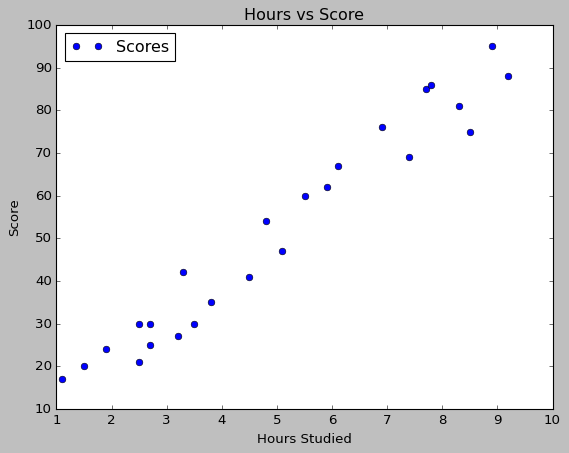

In [72]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Score')  
plt.show()

**Data Preparation**

Our goal is to predict the score. So the depenedent variable will be Scores and the only feature we have available is Hours ,which will be independent variable.

In [73]:
X = df.iloc[:, :-1].values  # Independent Variable 
y = df.iloc[:, 1].values   # Dependent Variable 

Breaking our DataSet into Training and Test set to give a model a fair assessment, we’d like to know how well our data would perform on data it hasn’t seen yet. 

In [74]:

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) # test_size= 0.2 means that our Data Set is break into 80:20 ratio . 

**Training the Model**

Linear Regression is the supervised Machine Learning model in which the model finds the best fit linear line between the independent and dependent variable

In [75]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(X_train, y_train) 


LinearRegression()

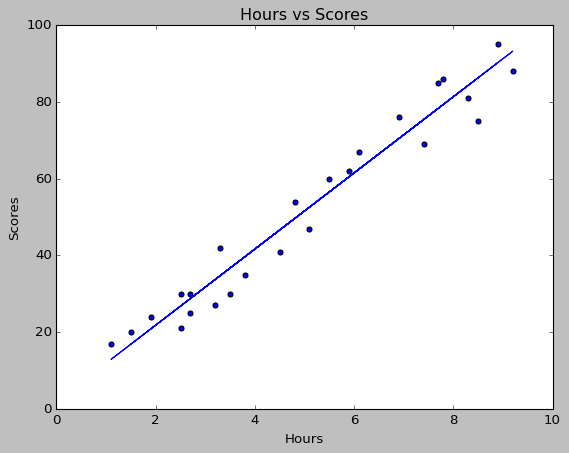

In [76]:
# Plotting the regression line
line = model.coef_*X+model.intercept_
plt.scatter(X, y)
plt.plot(X, line);
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours vs Scores')
plt.show()

**Evaluating The Model**

In [77]:
# We will predict from the validation data
y_pred = model.predict(X_test) 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982


In [78]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**Making prediction**


In [79]:
# Predicting
prediction = model.predict(np.array([[9.25]])) # 9.25 study hours of student 

# Printing the result
print(f'The score predicted for 9.25 Hours is {prediction[0]:.2f}')


The score predicted for 9.25 Hours is 93.69
